____

### <font color='magenta'>Plan: Week of Dec. 3rd</font>

This is our last new material! 

Presentations are this Wednesday.  

There is no more HW in the course, other than the extra credit HW for which you have until Friday at midnight; and, of course, you do not need to do any or all of it. Spend the time on your project only if you already have the grade you want in the course.

____

____

# <font color='yellow'>Data Science in Sixty Four Dimensions</font>

We will continue our brief study of classification with image data. 

Today we will remind ourselves of the basic EDA steps using a dataset type we haven't used yet in the class. The dataset is called "MNIST"; if you have played with ML in the past, you almost certainly know it, but don't worry if you have never heard of it before.

✍️ Your first task is to read in the MNIST dataset. A simplified (smaller) version is already in `sklearn`, so let's grab that. It's called "digits". Read it in and look at what came in. In a markdown cell describe what `sklearn` gives to you. What form is the data in? Since we are doing classification, where does it store $X$ and $y$? What else does `sklearn` provide? What does $X$ look like (how it is provided to you)? For example, what is the shape of the data matrix $X$? 

In [139]:
# some code to get you started.....
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

digits = datasets.load_digits()
print(f"The data set has shape (rows, columns): {digits.data.shape}.\n")

numbers = digits.data

for data_point in range(3):
  print(f"Data point {data_point+1} is:\n {numbers[data_point]}.\n")

The data set has shape (rows, columns): (1797, 64).

Data point 1 is:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.].

Data point 2 is:
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.].

Data point 3 is:
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.].



Each data point provides $64$ numbers. This is a bit larger than, say, iris, which had $4$ numbers. In what you loaded, does `sklearn` provide feature names for the $64$ features?

✍️ What are the feature names, and what are the classification targets? What are the target names?

✍️ Discuss with your group the features: how are these features being used to allow us to handle an image? Does this strategy help use standard tools for this type of data, just like we used standard regression for handling some time series forecasting problems? 

_____

Ok, now that you are comfortable with what `sklearn` gave us, let's talk a little about this very famous dataset. 

The idea behind MNIST is to use ML to learn how to recognize handwritten numbers: the digits between $0$ and $9$. This is an interesting dataset because the data comes to us in the form of images, not just some numbers. While there are some pretty specific ways to handle images in ML, we'll use the simplest approach here. What we do is "unravel" the image into a string of features: each individual pixel of the image is a feature. Because the image has a lot of pixels, we end up with many features -- $64$ in this case. Iris and penguins only had $4$ features. To see this, let's put the image back to together and visualize the data. In `sklearn`, the images are square $8\times 8$, so we can `reshape` them and make an image. 

Since you may not have done this before, I'll give you the code. 

✍️ Discuss with your group, and research on the internet, applications of what we are doing today. That is, list and discuss several ways of classifying images of all kinds. I'll get you started with one example: recognizing addresses in photos. 

✍️ Comment on the interesting parts of this code (below) to indicate that you know exactly what it is doing. Add titles to the images using the labels `sklearn` gave you. These labels are what we want to predict, given an image. 


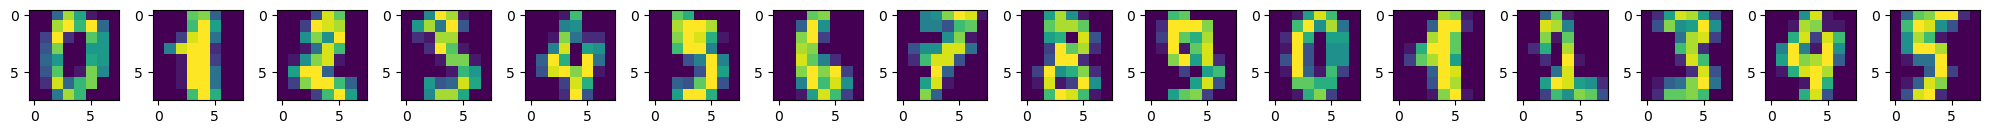

In [140]:
num_to_plot = 16

plt.figure(figsize=(20,20))
for index in range(num_to_plot):
  plt.subplot(1,num_to_plot,index+1)
  plt.imshow(numbers[index].reshape((8,8)))

plt.tight_layout()

These digits may not look great to you; there are, in fact, [versions of this](https://en.wikipedia.org/wiki/MNIST_database) in $784$ dimensions to provide more resolution. I like this smaller $64$-dimensional dataset because when it works it is really impressive - it's harder for the ML. 

✍️ When you do this EDA/viz on the dataset, which digits do you think the ML will confuse? Later we will make a confusion matrix so that we can quantify what the classifers confuses; but, it is interesting for you to make your predictions now! 

✍️ Check the dataset for any problems you can see. Are there missing values? What are the numerical values? At this point, do you feel you need to scale the data? Why or why not? Are there other preprocessing steps needed at this point? 

____


✍️ Next, split the data into training and testing sets. Use `sklearn`'s `train_test_split`. [Read its docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and itemize what the various options are. When would you use these options? As you work through this, be sure to return back here to vary the options to see what they do. For example, for your project, you may find better performance if you don't use the defaults. 

✍️ This dataset has $>1700$ rows. How would you break this up into a smaller dataset with, say, $500$ rows? It'll be interesting to see what accuracy we can get as a function of the number of images we have to train with. 

____
## <font color='green'> Finally: Machine Learning Estimators </font>
____

We have our data understood, visualized, scaled and split: we are ready for the ML steps. Note that nothing we have done yet cares about the ML estimator we will use; in fact, we _could_ be doing regression at this point. 

I mentioned in the lecture last week that it is a good idea to use all of the classifiers at once. As we will see, this adds almost no complexity to your code, other than copying, pasting and changing a few words in each line. Importantly, you don't know in advance which estimator will work best on your data, so you should always **try all estimators**. Over time, you might build your intuition, or have some other reason for a particular choice, but for now use all/many of the classifiers. (Same is true for regression, clustering, etc.) 

I should mention a counter example that really illustrates the point: I wouldn't always use all of the `sklearn` algorithms for dimensionality reduction. Why? Because the algorithms do very different things: I would research the algorithms and pick the one that does what my problem really needs. The point is that if the estimators are all equivalent, you really have no reason to not use all of them; if you know they have a specialized function, then take that into account. 

Let's see what using many classifiers would look like. Lucky for you, people have already taken this philosophy and made very nice visualizations and comparisons. [Go to this website](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and look at the figure. Look at the leftmost columns - there are three datasets (the rows) for classification in 2D. (We are working in $64$ dimensions, but not everyone can be us! 😂) Note that they compare $10$ different classifiers - these are the remaining columns. 

✍️ Open a markdown cell and give a summary of this visualization. This is a great way to learn the names of classifiers and see how they work. Which ones are really good or bad at a certain job? For example, look at the datasets:
* the bottom one is perhaps easiest: blue on the left, red on the right; do they all get this right? 
* the top dataset makes this a bit harder by having the two classes fold into each in a way that doesn't follow a line - it's like two moons,
* the middle dataset has one class inside the other; which fail for this case? 

In case you don't spot it right away: there are tiny scores given in the lower right of each image. Also, pay attention to whether the data points are solid or semi-tranparent: that's training versus testing - this gives you a sense for what the test-train split does for you. Include these insights in your discussion in the markdown cell. (You might want to increase the size of the plot on your screen!) 

You can quickly see that if you can't see your data, which we can't in $64$ dimensions, it would be very hard to know which estimator will work best. 

✍️ In another markdown cell, describe how they coded all of these estimators. That is, read through the code and see how they easily handled $10$ classifiers. How would you set up your code to do something similar? What you want to avoid is having $10$ separate codes, one for each estimator.

In [141]:
Y_full=digits.target

X_full=digits.data


____

### Coding Classifiers

It might be a good idea to put each of your group members in charge of one estimator. 

We are now ready for the ML part. We can break up the ML into four basic steps:
1. `import` the estimator,
2. create an instantiation of the estimator,
3. train the estimator on the data
4. make predictions! 

Of course, there are other steps you can and should add to this, but let's start simply. 

Typically, the first step will look like this:

In [142]:
from sklearn import svm

Below, you will have many lines like this (or in a comma-separated list). This choice happens to be what is called a support vector machine (SVM), which we will assume for today is a black box estimator. (You'll learn the actual algorithm in a "real" ML course. SVMs are _very_ powerful.)

The next step is to instantiate the estimator and assign it to an object. This looks like this:

In [143]:
len(X_full)

1797

In [144]:
len(Y_full)

1797

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_full, Y_full, test_size=0.2, random_state=42)

In [146]:
clf_svm = svm.SVC(gamma=0.001)

There are three items of note here:
1. note that we use the SVC library - because we are doing classification; SVMs can be used for regression as well (SVR),
2. when you run the code, nothing happens! note that we are not yet using the data, 
3. there is a value of _gamma_ given; this is an example of a "hyperparameter". 

Next, let's use the estimator we just built and use it to fit to our data:

In [147]:
clf_svm.fit(X_train, y_train);

Again, nothing obvious happens. What happened is that the SVM learned its parameters from the data for the case of a classifer with the value `gamma=0.001`. Now, the internal object knows this new information and we can use it to make predictions. 

So, final step: let's make predictions. At this point, you could deploy your machine in the real world and start using it to make predictions. But, the usual next step is to make predictions on the unseen test data we held back. This provides a check before we deploy. 

In [148]:
predicted = clf_svm.predict(X_test)
predicted

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [149]:
y_test-predicted

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [150]:

class_names = digits.target_names
clf_svm.score(X_test,y_test)


0.9888888888888889

Confusion matrix, without normalization
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.97058824 0.         0.02941176
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0

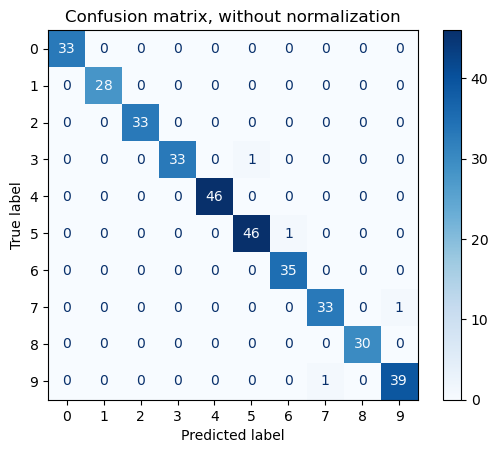

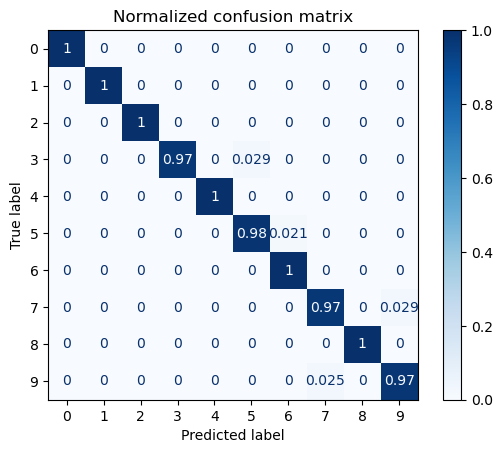

In [151]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [152]:
X_full=np.array(digits.data)
Y_full=np.array(digits.target)
size=X_full.shape[0]
np.random.seed(42) 

numbs=np.arange(size)
ran_numbs=np.random.choice(numbs, 500, replace=False, p=None)

X_500=np.zeros((500,64))
Y_500=np.zeros(500)

for i in range(500):
    X_500[i,:]=X_full[ran_numbs[i],:]
    Y_500[i]=Y_full[ran_numbs[i]]

[1.0, 0.99, 0.9866666666666667, 0.995, 0.976, 0.9733333333333334, 0.9314285714285714, 0.8775, 0.7222222222222222]


Text(0.5, 1.0, 'SVC')

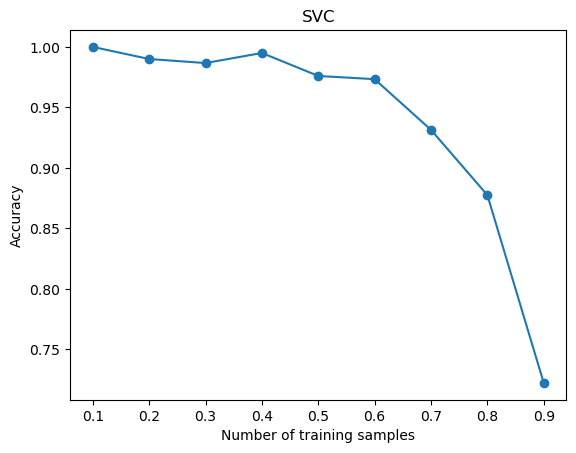

In [153]:
scores=[]

test_s=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for test_size in test_s:
    
    X_train, X_test, y_train, y_test = train_test_split(X_500, Y_500, test_size=test_size, random_state=42)
    clf_svm.fit(X_train, y_train);
    scores.append(clf_svm.score(X_test,y_test))
    
    
print(scores)

plt.scatter(test_s,scores)
plt.ylabel("Accuracy")
plt.xlabel("Number of training samples")
plt.plot(test_s,scores)
plt.title('SVC')



In [154]:
class_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Confusion matrix, without normalization
[[30  0  1  0  4 11  0  0  0  0]
 [ 0 33  0  0  1  3  0  0  0  0]
 [ 0  1 36  2  0  0  0  0  1  0]
 [ 0  1  1 25  0 21  0  0  1  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  1 52  1  0  0  0]
 [ 0  0  0  0  1  3 40  0  0  0]
 [ 0  0  0  0  0  1  0 41  0  0]
 [ 0 17  0  0  0  3  0  1 16  0]
 [ 0  1  0  1  0 47  0  0  0  2]]
Normalized confusion matrix
[[0.65217391 0.         0.02173913 0.         0.08695652 0.23913043
  0.         0.         0.         0.        ]
 [0.         0.89189189 0.         0.         0.02702703 0.08108108
  0.         0.         0.         0.        ]
 [0.         0.025      0.9        0.05       0.         0.
  0.         0.         0.025      0.        ]
 [0.         0.02040816 0.02040816 0.51020408 0.         0.42857143
  0.         0.         0.02040816 0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.     

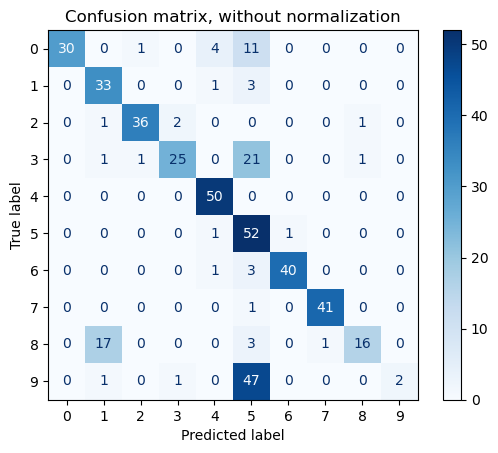

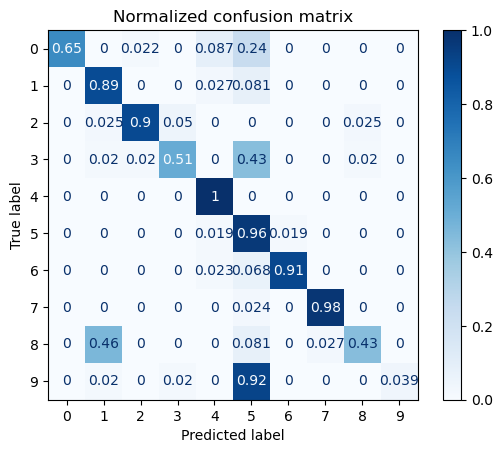

In [155]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

🤔 In a markdown cell, describe what just happened and what is stored in the variable predicted

`.predict` is predicting the the X_Test for and the predictions are the predicted classes for different target images



In [156]:
X_test=X_test.reshape(450,8,8)
X_test

array([[[ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0., 15., ..., 12.,  0.,  0.],
        [ 0.,  3., 10., ..., 12.,  5.,  0.],
        ...,
        [ 0.,  5.,  8., ..., 10.,  6.,  0.],
        [ 0.,  4., 13., ..., 13.,  0.,  0.],
        [ 0.,  0.,  6., ...,  3.,  0.,  0.]],

       [[ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  0., 12., ...,  5.,  0.,  0.],
        [ 0.,  2., 16., ..., 15.,  1.,  0.],
        ...,
        [ 0.,  3.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0.,  2., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  6., ...,  5.,  0.,  0.],
        [ 0.,  2., 16., ..., 15.,  2.,  0.],
        [ 0.,  8., 12., ..., 15.,  8.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  3., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  9., ..., 13.,  2.,  0.],
        [ 0.,  2., 15., ...,  3.,  0.,  0.],
        [ 0.,  7.,  9., ...,  4.,  0.,  0.

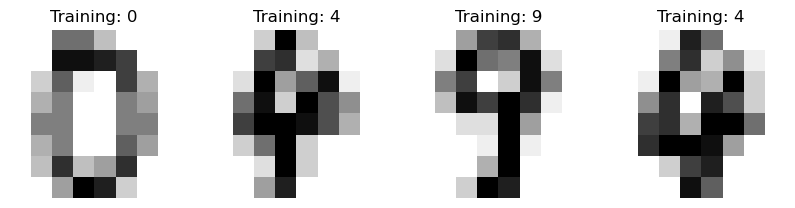

In [157]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, X_test[:4], y_test[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

[0.78, 0.78, 0.8, 0.755, 0.748, 0.74, 0.7342857142857143, 0.7375, 0.7222222222222222]


Text(0.5, 1.0, 'GaussianProcessClassifier')

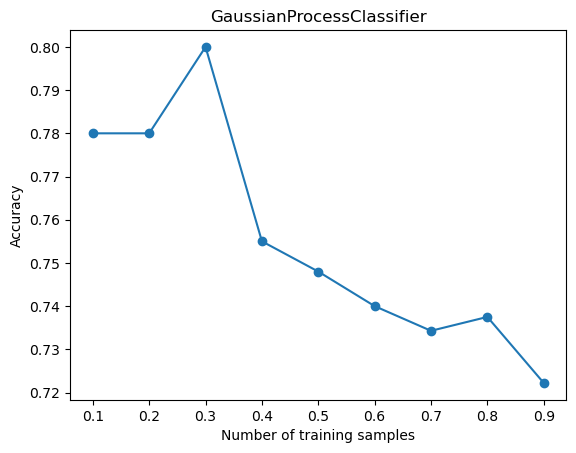

In [158]:
scores=[]

test_s=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
from sklearn.gaussian_process import GaussianProcessClassifier

clf_gaussian = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)


for test_size in test_s:
    
    X_train, X_test, y_train, y_test = train_test_split(X_500, Y_500, test_size=test_size, random_state=42)
    clf_gaussian.fit(X_train, y_train);
    scores.append(clf_svm.score(X_test,y_test))

    
print(scores)


plt.scatter(test_s,scores)
plt.ylabel("Accuracy")
plt.xlabel("Number of training samples")
plt.plot(test_s,scores)
plt.title('GaussianProcessClassifier')


Confusion matrix, without normalization
[[30  0  1  0  4 11  0  0  0  0]
 [ 0 33  0  0  1  3  0  0  0  0]
 [ 0  1 36  2  0  0  0  0  1  0]
 [ 0  1  1 25  0 21  0  0  1  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  1 52  1  0  0  0]
 [ 0  0  0  0  1  3 40  0  0  0]
 [ 0  0  0  0  0  1  0 41  0  0]
 [ 0 17  0  0  0  3  0  1 16  0]
 [ 0  1  0  1  0 47  0  0  0  2]]
Normalized confusion matrix
[[0.65217391 0.         0.02173913 0.         0.08695652 0.23913043
  0.         0.         0.         0.        ]
 [0.         0.89189189 0.         0.         0.02702703 0.08108108
  0.         0.         0.         0.        ]
 [0.         0.025      0.9        0.05       0.         0.
  0.         0.         0.025      0.        ]
 [0.         0.02040816 0.02040816 0.51020408 0.         0.42857143
  0.         0.         0.02040816 0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.     

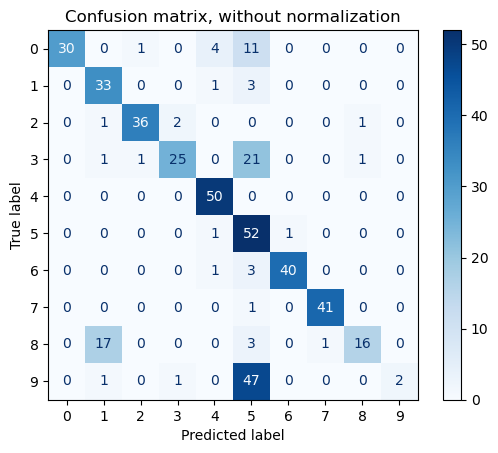

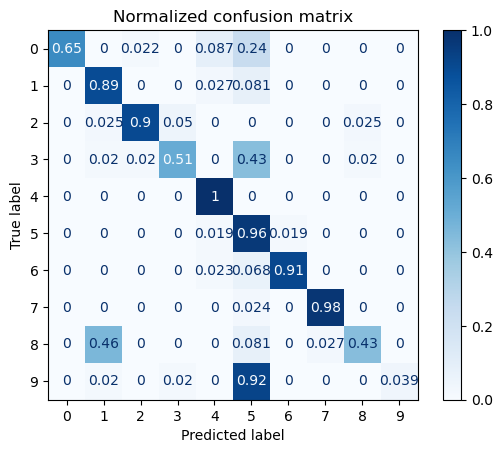

In [159]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

[0.98, 0.96, 0.9533333333333334, 0.93, 0.904, 0.89, 0.8457142857142858, 0.7775, 0.5422222222222223]


Text(0.5, 1.0, 'KNN Classifier')

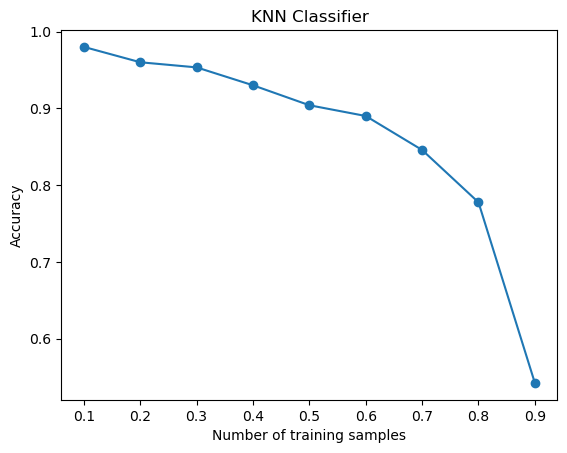

In [160]:
scores=[]
from sklearn.neighbors import KNeighborsClassifier


test_s=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

from sklearn.gaussian_process import GaussianProcessClassifier

clf_knn = KNeighborsClassifier(n_neighbors=10)


for test_size in test_s:
    X_train, X_test, y_train, y_test = train_test_split(X_500, Y_500, test_size=test_size, random_state=42)
    clf_knn.fit(X_train, y_train);
    scores.append(clf_knn.score(X_test,y_test))

    
print(scores)

plt.scatter(test_s,scores)
plt.ylabel("Accuracy")
plt.xlabel("Number of training samples")
plt.plot(test_s,scores)
plt.title('KNN Classifier')

Confusion matrix, without normalization
[[30  0  1  0  4 11  0  0  0  0]
 [ 0 33  0  0  1  3  0  0  0  0]
 [ 0  1 36  2  0  0  0  0  1  0]
 [ 0  1  1 25  0 21  0  0  1  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  1 52  1  0  0  0]
 [ 0  0  0  0  1  3 40  0  0  0]
 [ 0  0  0  0  0  1  0 41  0  0]
 [ 0 17  0  0  0  3  0  1 16  0]
 [ 0  1  0  1  0 47  0  0  0  2]]
Normalized confusion matrix
[[0.65217391 0.         0.02173913 0.         0.08695652 0.23913043
  0.         0.         0.         0.        ]
 [0.         0.89189189 0.         0.         0.02702703 0.08108108
  0.         0.         0.         0.        ]
 [0.         0.025      0.9        0.05       0.         0.
  0.         0.         0.025      0.        ]
 [0.         0.02040816 0.02040816 0.51020408 0.         0.42857143
  0.         0.         0.02040816 0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.     

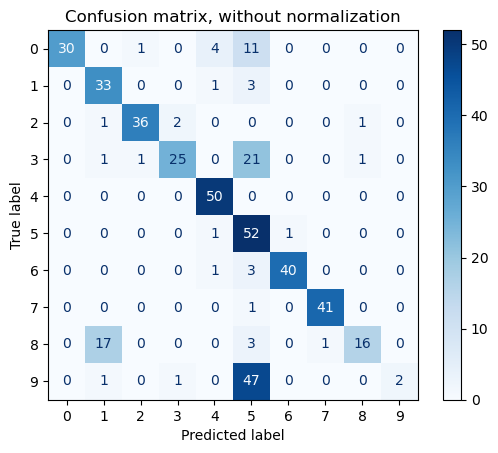

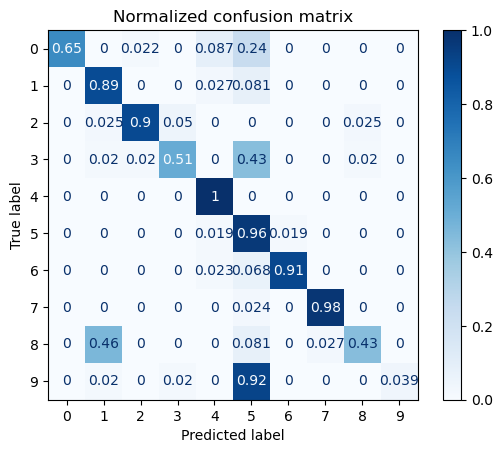

In [161]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

[0.96, 0.96, 0.9266666666666666, 0.95, 0.932, 0.94, 0.9, 0.9025, 0.8422222222222222]


Text(0.5, 1.0, 'LogisticRegression')

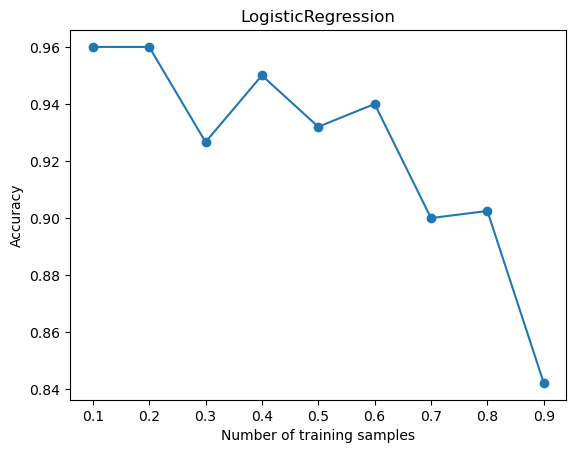

In [162]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter=100000)
scores=[]


test_s=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]



for test_size in test_s:
    X_train, X_test, y_train, y_test = train_test_split(X_500, Y_500, test_size=test_size, random_state=42)
    clf_lr.fit(X_train, y_train);
    scores.append(clf_lr.score(X_test,y_test))

    
print(scores)

plt.scatter(test_s,scores)
plt.ylabel("Accuracy")
plt.xlabel("Number of training samples")
plt.plot(test_s,scores)
plt.title('LogisticRegression')

Confusion matrix, without normalization
[[30  0  1  0  4 11  0  0  0  0]
 [ 0 33  0  0  1  3  0  0  0  0]
 [ 0  1 36  2  0  0  0  0  1  0]
 [ 0  1  1 25  0 21  0  0  1  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  1 52  1  0  0  0]
 [ 0  0  0  0  1  3 40  0  0  0]
 [ 0  0  0  0  0  1  0 41  0  0]
 [ 0 17  0  0  0  3  0  1 16  0]
 [ 0  1  0  1  0 47  0  0  0  2]]
Normalized confusion matrix
[[0.65217391 0.         0.02173913 0.         0.08695652 0.23913043
  0.         0.         0.         0.        ]
 [0.         0.89189189 0.         0.         0.02702703 0.08108108
  0.         0.         0.         0.        ]
 [0.         0.025      0.9        0.05       0.         0.
  0.         0.         0.025      0.        ]
 [0.         0.02040816 0.02040816 0.51020408 0.         0.42857143
  0.         0.         0.02040816 0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.     

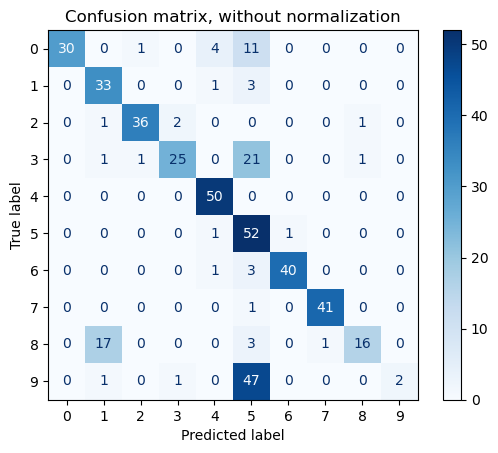

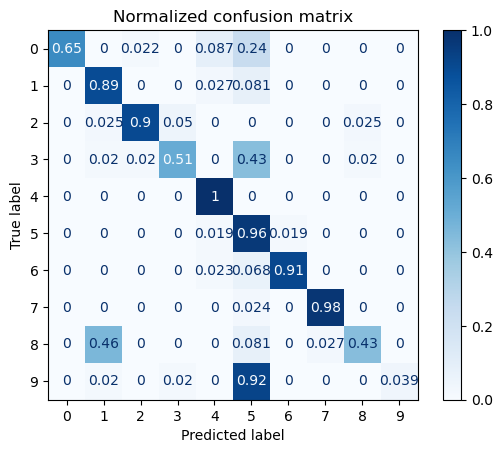

In [163]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

[0.28, 0.27, 0.32666666666666666, 0.255, 0.26, 0.23333333333333334, 0.24285714285714285, 0.3275, 0.19777777777777777]


Text(0.5, 1.0, 'AdaBoostClassifier')

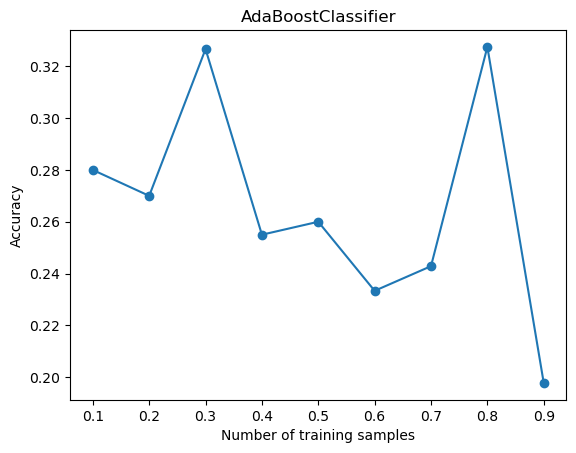

In [164]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

clf_ada = AdaBoostClassifier(random_state=42)
scores=[]


test_s=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]



for test_size in test_s:
    X_train, X_test, y_train, y_test = train_test_split(X_500, Y_500, test_size=test_size, random_state=42)
    clf_ada.fit(X_train, y_train);
    scores.append(clf_ada.score(X_test,y_test))

    
print(scores)

plt.scatter(test_s,scores)
plt.ylabel("Accuracy")
plt.xlabel("Number of training samples")
plt.plot(test_s,scores)
plt.title('AdaBoostClassifier')

Confusion matrix, without normalization
[[30  0  1  0  4 11  0  0  0  0]
 [ 0 33  0  0  1  3  0  0  0  0]
 [ 0  1 36  2  0  0  0  0  1  0]
 [ 0  1  1 25  0 21  0  0  1  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  1 52  1  0  0  0]
 [ 0  0  0  0  1  3 40  0  0  0]
 [ 0  0  0  0  0  1  0 41  0  0]
 [ 0 17  0  0  0  3  0  1 16  0]
 [ 0  1  0  1  0 47  0  0  0  2]]
Normalized confusion matrix
[[0.65217391 0.         0.02173913 0.         0.08695652 0.23913043
  0.         0.         0.         0.        ]
 [0.         0.89189189 0.         0.         0.02702703 0.08108108
  0.         0.         0.         0.        ]
 [0.         0.025      0.9        0.05       0.         0.
  0.         0.         0.025      0.        ]
 [0.         0.02040816 0.02040816 0.51020408 0.         0.42857143
  0.         0.         0.02040816 0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.     

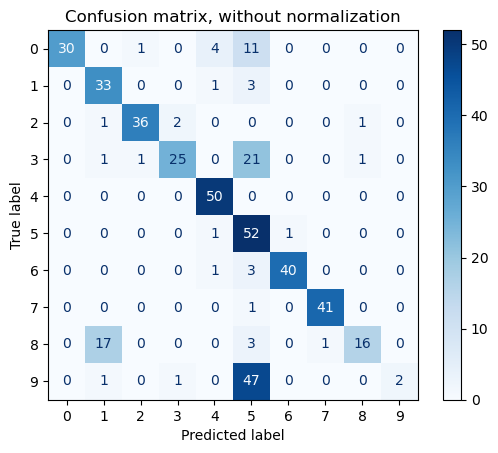

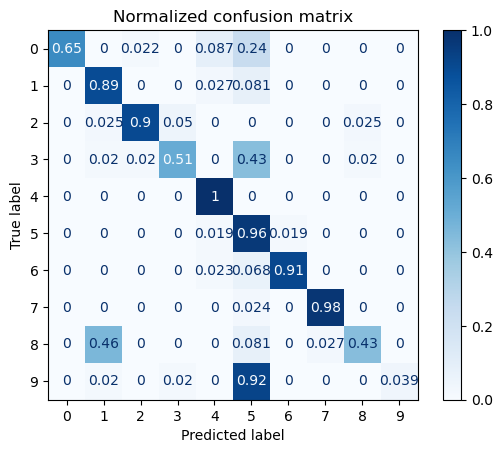

In [165]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Examine what this gives you. 

✍🏼 In a markdown cell, describe what just happened and what is stored in the variable `predicted`. 

✍🏼 Check accuracy for various estimators:
1. plot the first few images in `X_test`, and put both the predicted and actual values in the title, as done [here](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py),
2. modify the code above to have at least $5$ more classifers.

✍🏼 Visually, using the plot you just made, how well did the SVC work? Vary those things you can vary (e.g., rows in the dataset, hyperparameters) and explore how sensitive the predictions are to these choices. 

✍🏼 Compute confusion matrices for several of the estimators and describe what they reveal. 


🤔.  variable `predicted`

variable `predicted` had the predicted values for X_test, we can test it against the y_test to check our classifcations accuracy


🤔. accuracy for various estimators

we could obeserve that SVC and KNN classifier provided good classifications even in smaller traing and test sample sizes
 

🤔. how sensitive the predictions are to these choices

We can understand how variations in dataset size and SVM hyperparameters impact image classification performance as follows

**Dataset Size Variations:**
Smaller Dataset: We might see high training accuracy but poor generalization due to overfitting, as the SVM doesn't capture the full data variability.

**Larger Dataset:** Generally leads to better generalization, reducing overfitting, though with increased training time. However, if the additional data is noisy, improvements might be minimal.

**Hyperparameter Adjustments:**
Kernel Type: Selecting between linear, RBF, and polynomial kernels can significantly affect performance. Linear is suitable for linear data, while RBF and polynomial are better for non-linear data.

**Regularization (C):** A lower C value generalizes more (higher bias, lower variance), but too low can cause underfitting. A higher C aims for perfect classification of training data but can lead to overfitting.

**Gamma (RBF kernel):** Higher gamma values create complex models, risking overfitting. Lower gamma values result in smoother decision boundaries, potentially better for generalization.

**Prediction Sensitivity:**
High Sensitivity: Large performance shifts with small hyperparameter or dataset size changes indicate overfitting.

**Low Sensitivity**: Minimal impact from changes suggests a robust but possibly oversimplified model, risking underfitting.

🤔.Compute confusion matrices for several of the estimators and describe what they reveal. 

A confusion matrix is an essential tool for assessing supervised image classifiers, offering key insights into their performance and areas needing improvement. It tracks true positives (TP), where the classifier accurately identifies a class's presence; true negatives (TN), where it correctly notes a class's absence; false positives (FP), or Type I errors, where the classifier wrongly indicates a class's presence; and false negatives (FN), or Type II errors, where it misses a class's presence.

**Performance on Specific Classes**: It shows how well the classifier distinguishes between classes, indicating if more distinctive features or data are needed for certain classes.
Bias Towards Certain Classes: Consistent misclassification of a particular class suggests bias, possibly due to unbalanced data or insufficient feature extraction., we can see that the svc and knn had good performance in the classification